<a href="https://colab.research.google.com/github/zoya-ivanova/analytics/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D0%B1%D0%BB%D0%BE%D0%BA%D1%83_%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data_analysis

###Описание бизнес кейса


###1) Ваш продукт - это школа английского языка Лендинг для языковой школы. Проанализируйте конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по улучшению первого экрана лендинг.<br>

In [ ]:
# Анализ конкурентов

# | Num  |     Idea                     | Наш продукт |  SkyEng  | Lingvoleoe |
# |------|------------------------------| ----------  |----------| ---------- |
# | 1    | Пробовать бесплатно          |      +      |    -     |      -     |
# | 2    | Скидка/получить выгоду       |      -      |    +     |      -     |
# | 3    | Обещание скорости/реклама    |      -      |    +     |      +     |
#  ------|------------------------------| ----------  |----------| ----------

**Если** мы выведем информацию о действующей скидке на первые 5 онлайн-занятий в 30%,<br>
**Посредством** создания банера на первой (главной) странице сайта<br>
**То** на 20% повысится частота покупок (конверсия)<br>**Потому что** посетителю проще решится на дорогостоящую и обязывающую к действию покупку, благодаря  значительной скидке.


###2) Подведите результаты эксперимента
в экселе по следующим данным: ab_stats.csv - Google Диск:<br>
Стат значимо ли отличается ARPPU в двух группах? Какие рекомендации дадите
менеджеру?


ARPPU (Average Revenue Per Paying User) - средний доход, который приносит платящий пользователь.

In [29]:
#Стат значимо ли отличается ARPPU в двух группах?
# Проведем анализ данных

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import kstest

In [2]:
#Подгружаем данные с гугл диска
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ab_stats.csv')

# Смотрим датафрейм
data.head(5)

Mounted at /content/drive


,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [3]:
# Проверяем тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [4]:
# размеры таблицы по двум осям
data.shape

(23652, 5)

In [5]:
# проверяем пустые значения
data.isna().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

In [6]:
# Проверяем наличие дубликатов
data.duplicated().sum()

3733

In [7]:
# Удаляем дубликаты
df = data.drop_duplicates()

In [8]:
# Проверим долю дублей
duplic = data.duplicated().sum()/data.shape[0]
duplic

0.1578302046338576

In [9]:
# Отслеживаем объем выборок
df.ab_group.value_counts()

A    9989
B    9930
Name: ab_group, dtype: int64

In [10]:
# Проверяем основные показатели по выручке в группе А
df[df['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,9989.000000,9989.000000,9989.000000,9989.000000
mean,0.479208,0.060066,0.025628,6.977271
std,14.294192,1.597203,0.158031,2.010095
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.650110
50%,0.000000,0.000000,0.000000,6.978045
75%,0.000000,0.000000,0.000000,8.337812
max,1303.609284,152.000000,1.000000,17.728836


In [11]:
# Проверяем основные показатели по выручке в группе B
df[df['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,9930.000000,9930.000000,9930.000000,9930.000000
mean,0.291313,0.043404,0.023565,7.055544
std,3.463305,0.456187,0.151697,3.964544
min,0.000000,0.000000,0.000000,-8.286822
25%,0.000000,0.000000,0.000000,4.395660
50%,0.000000,0.000000,0.000000,7.068372
75%,0.000000,0.000000,0.000000,9.751318
max,113.830000,25.000000,1.000000,22.446822


<i>Пока мы еще ничего не посчитали, но уже можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B.<br>
Мы знаем, что среднее очень неустойчиво к выбросам, необходимо это учесть.<i>

In [12]:
# Рассчитываем ARPPU для каждой группы
#1. Находим кол-во пользователей, соверших хотя бы 1 покупку
users_A = df[(df['ab_group'] == 'A') & (df['num_purchases'] > 0)]
users_B = df[(df['ab_group'] == 'B') & (df['num_purchases'] > 0)]

#2. Находим количество пользователей, совершивших покупку(и)
num_users_A = len(users_A)
num_users_B = len(users_B)

#3. Суммируем доход от вышеуказанных пользователей
revenue_A = users_A['revenue'].sum()
revenue_B = users_B['revenue'].sum()

#3. Находим количество пользователей, совершивших покупку(и)
num_users_A = len(users_A)
num_users_B = len(users_B)

# Рассчитываем ARPPU
ARPPU_A = revenue_A / num_users_A
ARPPU_B = revenue_B / num_users_B

ARPPU_A, ARPPU_B


(18.698468640625, 12.36211875641025)

<i> ARPPU группы А выше, чем ARPPU группы В<i>

In [13]:
control = df[df['ab_group'] == 'A']
test = df[df['ab_group'] == 'B']


<Axes: xlabel='revenue'>

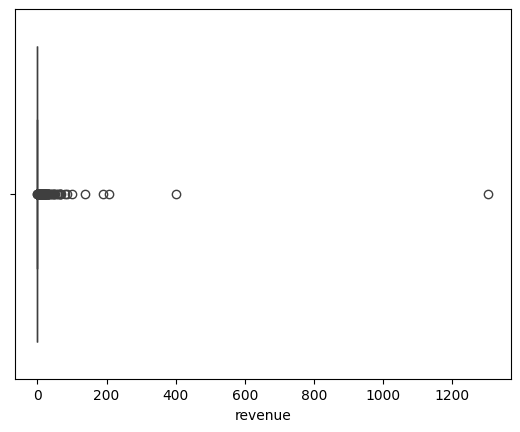

In [14]:
# Смотрим на выбросы, используя ящик с усами
sns.boxplot(control, x='revenue')

In [15]:
# Находим запись с выбросом
df[df['revenue'] == max(df['revenue'])]

,revenue,num_purchases,purchase,ab_group,av_site visit
11106,1303.609284,152,1,A,6.177276


In [16]:
q_contr_975 = control['revenue'].quantile(0.975)
q_contr_975


0.936254899999994

<Axes: xlabel='revenue'>

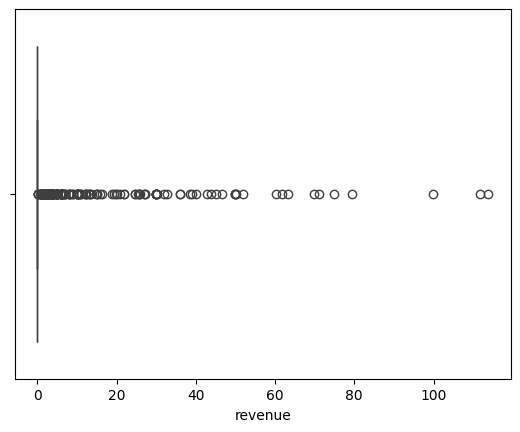

In [17]:
sns.boxplot(test, x="revenue")

In [18]:
q_test_975 = test['revenue'].quantile(0.975)
q_test_975


0.0

<Axes: xlabel='num_purchases', ylabel='Count'>

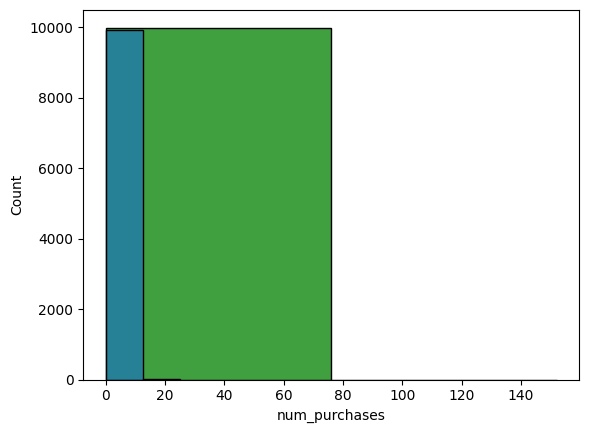

In [19]:
# График распределения, А - зеленый, В - голубой

sns.histplot(control, x='num_purchases', bins=2, color='g',)
sns.histplot(test, x='num_purchases', bins=2)


In [20]:
control_purchase_1 = control[control['num_purchases'] == 1]
test_purchase_1 = test[test['num_purchases'] == 1]

In [21]:
q_contr_pur_975 = control_purchase_1['revenue'].quantile(0.975)
q_contr_pur_975

21.748504624999978

In [22]:
q_test_pur_975 = test_purchase_1['revenue'].quantile(0.975)
q_test_pur_975

29.99

In [23]:
control_q975 = control_purchase_1[control_purchase_1['revenue'] <= q_contr_pur_975]
test_q975 = test_purchase_1[test_purchase_1['revenue'] <= q_test_pur_975]

<Axes: xlabel='revenue', ylabel='Count'>

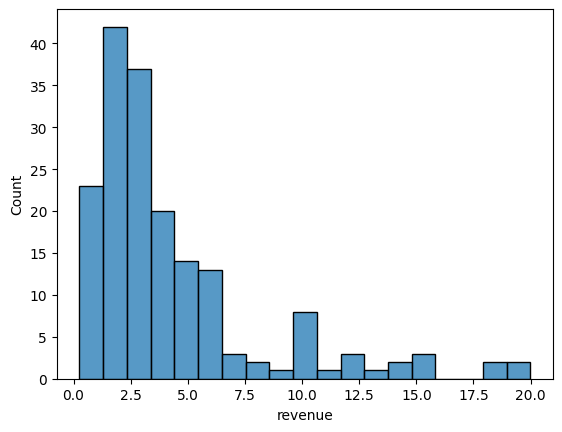

In [24]:
# Смотрим на "очищенные" данные (ислючены выбросы) вариант А
sns.histplot(control_q975, x='revenue')

<Axes: xlabel='revenue', ylabel='Count'>

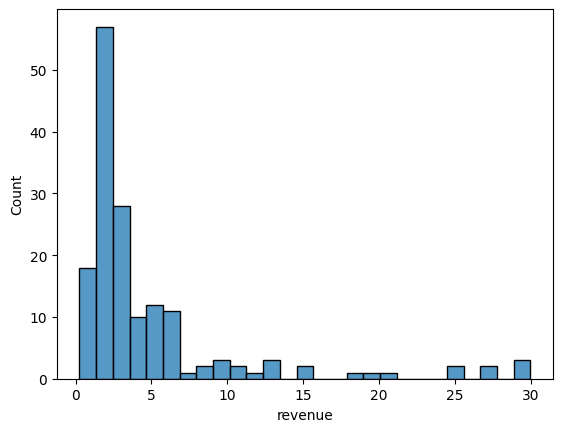

In [25]:
# Смотрим на "очищенные" данные (ислючены выбросы) вариант В
sns.histplot(test_q975, x='revenue')

<i>По графикам делаем вывод, что распределение ненормальное.<i>

In [36]:
# Перепроверим информацию о ненормальном распределении тестом Колмогорова-Смирнова (большая по объему выборка)
ks_stats = kstest(control_q975 ['revenue'], 'norm')
ks_stats

KstestResult(statistic=0.7992234162700744, pvalue=4.0082306559930667e-122, statistic_location=0.922332, statistic_sign=-1)

In [37]:
ks_stats = kstest(test_q975 ['revenue'], 'norm')
ks_stats

KstestResult(statistic=0.826393378242424, pvalue=3.077899722737379e-121, statistic_location=1.882905, statistic_sign=-1)

<i> p-value 4(для варианта А) и 3(для варианта) > 0,05 alpha, ведет к отказу от нулевой гипотезы о нормальном распределении.
Таким образом статистически подтверждаем ненормальное распределение.<i>

In [34]:
# Если необходимо сравнить две независимые совокупности, данные в которых не подчиняются закону нормального распределения,
# можно воспользоваться критерием Манна - Уитни, который иногда называется критерием Вилкоксона

mw_stats = mannwhitneyu(x=control_q975 ['revenue'], y=test_q975 ['revenue'])
mw_stats

MannwhitneyuResult(statistic=14076.0, pvalue=0.925426499812559)

<i> p-value 0,8 > alpha 0.05, нулевую гипотезу не отвергаем, так как
статистически значимых различий нет, даже если при проведении математических расчетов ARPPU в группе A выше, чем в группе B.<i>

Для увеличения продаж необходимо выдвинуть другую гипотезу, рассмотреть иные метрики.

###3) Мы хотим провести А/Б-тест для трех источников трафика.<br>
Нынешняя конверсия равна 5%, мы ожидаем прирост в 0,2%. Уровень доверия 97% и уровень мощности 87%. Всего на наш продукт заходит 40 000 пользователей в месяц.


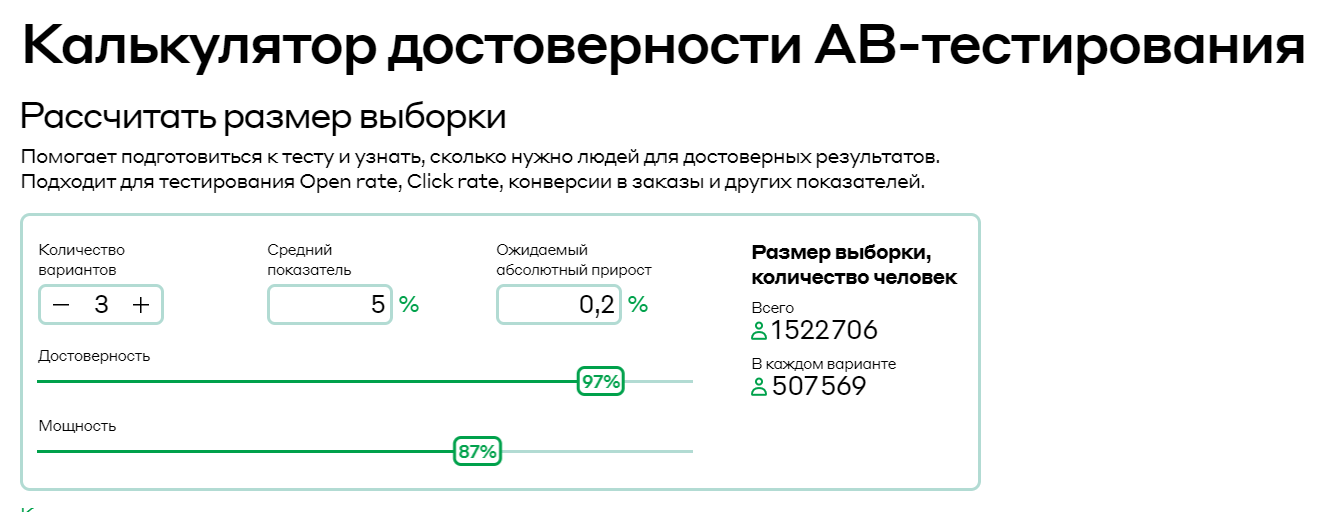


####3.1) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по результатам подсчета?<br>

<i>На каждый вариант необходимо 507 569 пользователей, ИТОГО 1 522 706 пользователей в месяц. Учитывая, что заходит только 40 000 пользователей, эксперимент может длиться не менее 38 месяцев (более 3-х лет). Такой срок недопустим для тестирования гипотезы и проведения А/В теста.<br>

Рекомендуется выбрать (поменять на) более масштабную гипотезу, которая принесет больший эффект (пророст конверсии).<i>






####3.2) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:<br>
1) 25 000<br>
2) 30 000<br>
3) 32 000<br>

<i>Варианты А, B, C значимо не различаются:<i>


#####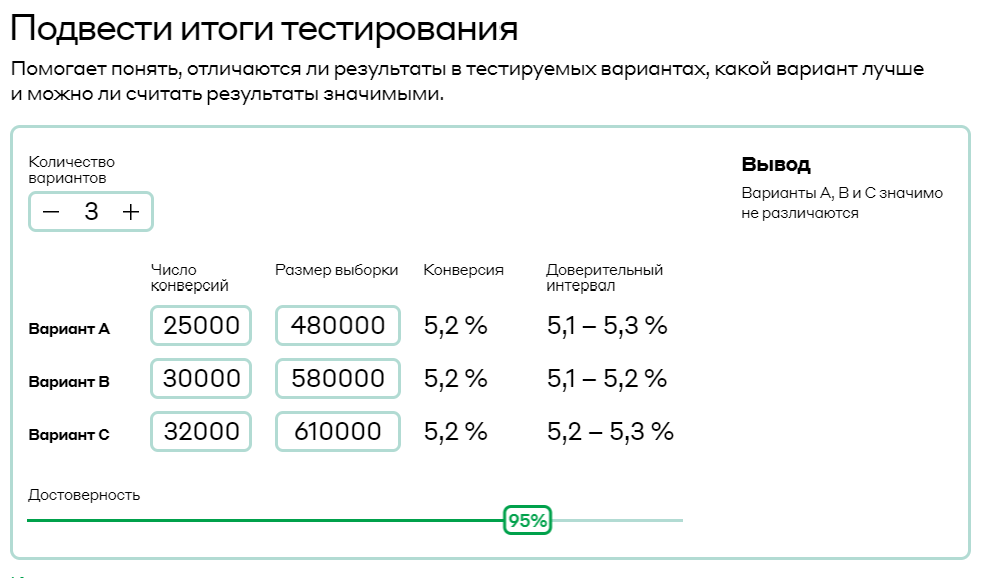

####4) Вы решили сравнивать метрику CPA в двух группах.
Размер выборки - 2350 элементов в каждой группе. Для проверки нормальности распределения на выборке в 2350 наблюдений применили, критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.<br>
Какой бы вывод мы могли сделать в данном случае?<br>
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему?<br>


<i> Учитывая полученные данные после проверки нормальности распределения, путем проведения теста Шапиро-Уилка:<br>
p-value = 0.00002 < alpha = 0.05, делаем вывод о статистически значимых доказательствах против нулевой гипотезы о нормальном распределении данных. Отвергаем нулевую гипотезу о нормальности распределения для данной выборки.<br>

Так как данные не являются нормально распределенными, для сравнения метрики CPA в двух группах можно использовать непараметрический критерий Манна-Уитни (или U-критерий), который устойчив к отклонениям от нормальности.<i>

####5) Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн?<br>
A) Средняя - 360, отклонение - 40, количество - 9802<br>
B) Средняя - 352, отклонение - 58, количество - 9789

<i>Статистически значимые различия при уровне доверия 80% есть.<br>
РАБОЧАЯ ВЕРСИЯ - ПЕРВАЯ<i>


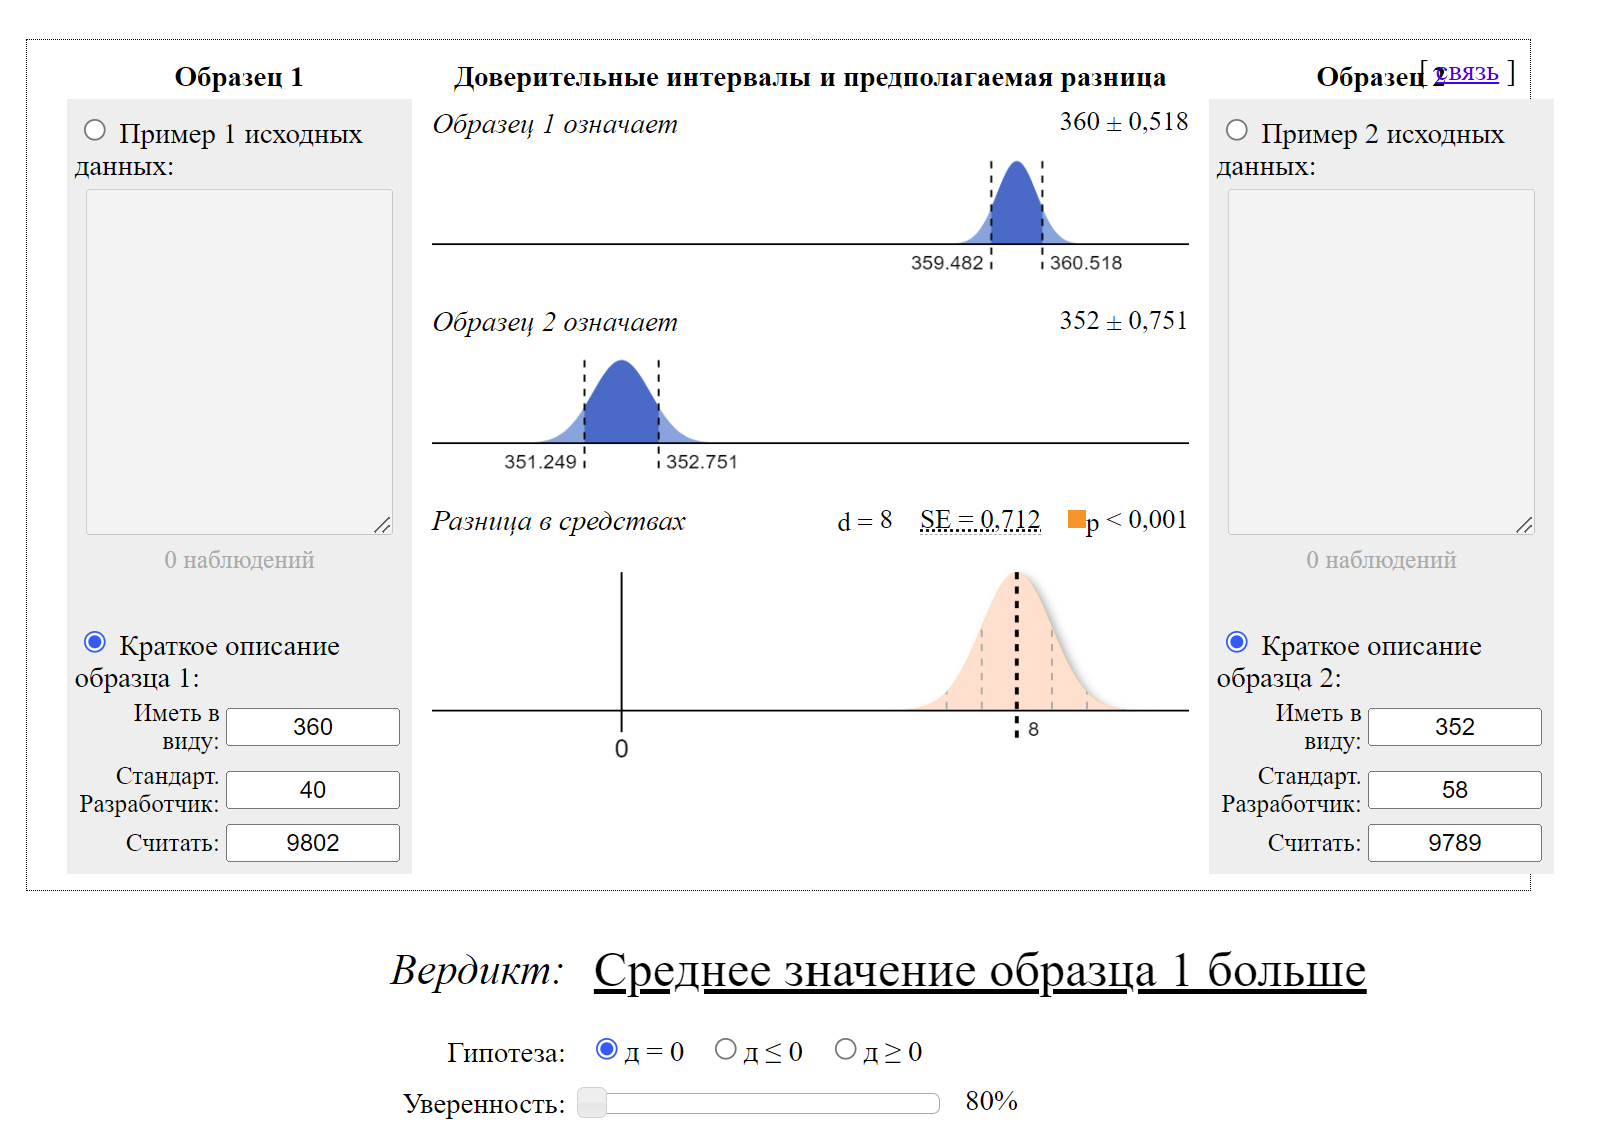

####6) Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны пользователя.<br>
На схеме необходимо отобразить:<br>
1) Управленческий процесс по договоренностям с внешними партнерами<br>
2) Архитектуру данных с указанием систем, из которых будем скачивать данные<br>
3) Внутрикомандное взаимодействие

####Общая схема проекта
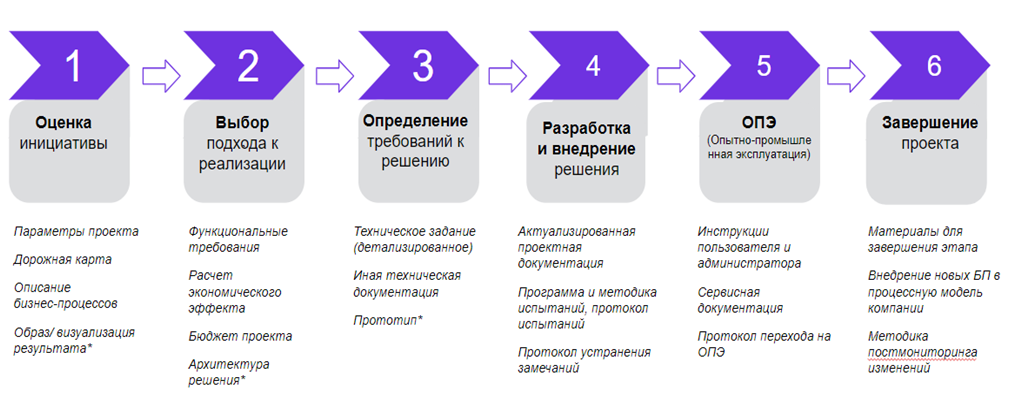

1. Сформировали гипотезу. Оцениваем инициативу:<br>Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны пользователя.<br>

2. Менеджеры он-лайн кинотеатра договариваются с банком-партнером о 99% кэшбеке на подписку первого месяца.

3. Подход к реализации. Принимаем за вариант А - первоначальный вид сервиса (без кэшбэка),за вариант В - первоначальный вид сервиса (с 99% кэшбэком).

4. Доработка сайти(сервиса) с возможностью применения кэшбек для пользователей.
Определение архитектуры (БД) програмистами, которая будет собирать статистику, либо использование систем аналитики для сайтов и мобильных приложений, которые собирают данные об источниках трафика, поведении пользователей и другой полезной информации (Google Analytics, Яндекс.Метрика).
Распределяют посетителей сайта по группам для проведения А/В теста. Сплитование.



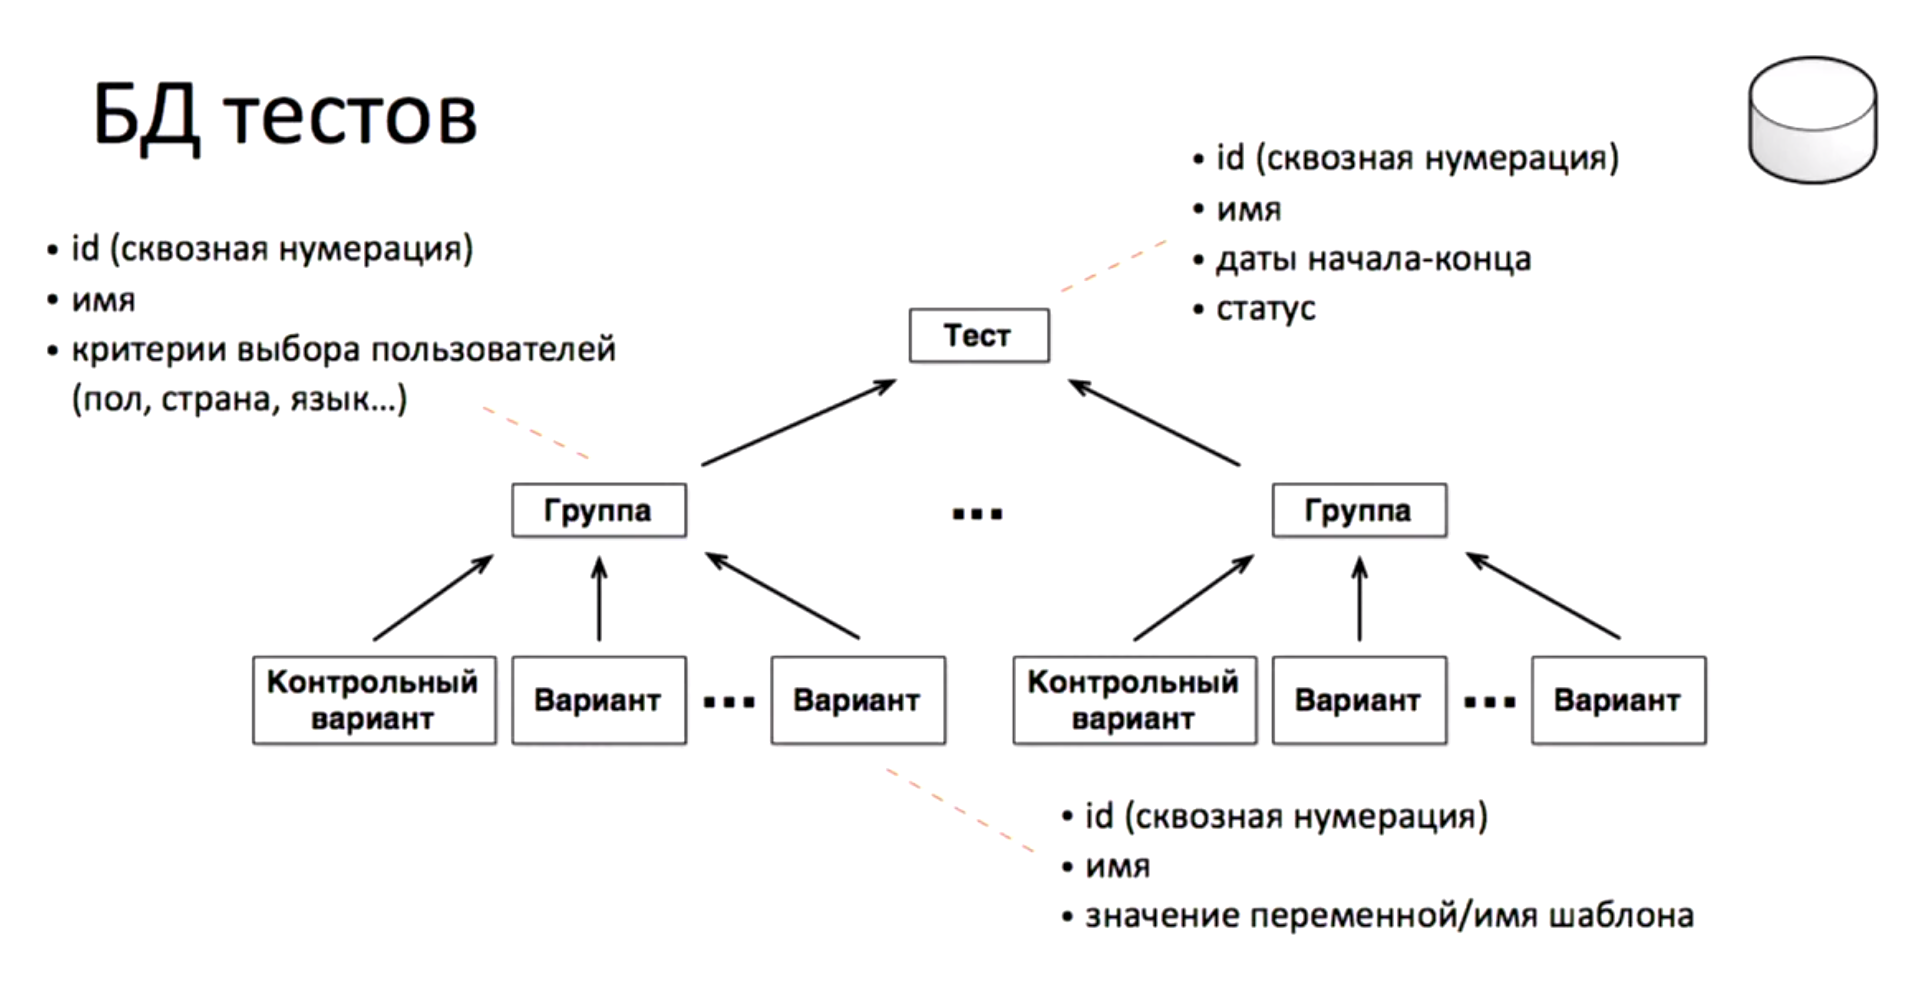

### Внутрикомандное взаимодействие:

Менеждеры (руководитель/менеджер проекта): ведет переговоры с банком, договораривается и заключает соглашение, информирует остальную команду разработчиков и аналитиков о ходе и результатах переговоров.

Команда разработки: дорабатывает и внедряет доработки на сайте (сервисе) для A/B тестирования с получением и использованием кэшбека. Взаимодействует с командой аналитиков по определению ключевых параментов и необходимых данных. Информирует о завершении сбора данных.

Аналитики: разрабатывают техническую документацию, проводят предварительный анализ гипотезы, проводят анализ результатов после проведения теста. Сообщают о результатах проведенного тестирования и его анализа.
В случае внедрения - контрольное тестирование (например через 3 мес.)

Менеждеры (руководитель/менеджер проекта): Принимает решение о реализации изменений на основе результатов теста.
При положительном результате дается команда разработчикам о внедрении в промышленную эксплуатацию доработанного сервиса с 99% кэшбэка на подписку первого месяца, для повышения конверсии в подписку.